<a href="https://colab.research.google.com/github/corincha/corin/blob/main/Semana2/Copia_de_Taller_Forecasting_Ocupacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Cargar dataset de ocupacion de sitios de parqueo
dataSJ = pd.read_csv("SJ.csv")
dataSJ.head()


,date,idCompany,numTrx
0,2022-08,1,68599
1,2022-09,1,86862
2,2022-10,1,99611
3,2022-11,1,109018
4,2022-12,1,115665


In [4]:
# Revisar cabecera y cola del dataset
dataSJ.head()

,date,idCompany,numTrx
0,2022-08,1,68599
1,2022-09,1,86862
2,2022-10,1,99611
3,2022-11,1,109018
4,2022-12,1,115665


In [5]:
#REVISAR COLA
dataSJ.tail()

,date,idCompany,numTrx
13,2023-09,1,126851
14,2023-10,1,137539
15,2023-11,1,145327
16,2023-12,1,135537
17,2024-01,1,148111


In [9]:
# Formatear la columna de fecha como año y mes
dataSJ["date"]=pd.to_datetime(dataSJ["date"],format= "%Y-%m")

In [10]:
# Verificar el nombre de los meses del dataset para comprobar que el formateo es correcto
dataSJ["date"].dt.month_name()

,date
0,August
1,September
2,October
3,November
4,December
5,January
6,February
7,March
8,April
9,May


In [11]:
# Contar el numero de datos del dataset
dataSJ.count()

,0
date,18
idCompany,18
numTrx,18


In [12]:
# Obtener una estadistica descriptiva básica del dataset, verificar si hay algo anormal

dataSJ.describe()

,date,idCompany,numTrx
count,18,18.0,18.000000
mean,2023-04-16 18:40:00,1.0,120111.833333
min,2022-08-01 00:00:00,1.0,68599.000000
25%,2022-12-08 18:00:00,1.0,110679.750000
50%,2023-04-16 00:00:00,1.0,125518.500000
75%,2023-08-24 06:00:00,1.0,135321.000000
max,2024-01-01 00:00:00,1.0,148111.000000
std,NaN,0.0,20840.047288


In [13]:
# Revisar si el ldataset tiene datos nullos

dataSJ.isnull().sum()

,0
date,0
idCompany,0
numTrx,0


In [14]:
# Establecer el campo fecha como index del dataframe

dataSJ.set_index("date",inplace=True)
dataSJ.head()

,idCompany,numTrx
date,,
2022-08-01,1,68599
2022-09-01,1,86862
2022-10-01,1,99611
2022-11-01,1,109018
2022-12-01,1,115665


In [15]:
# Verificar nuevamente el head de la tabla y comprobar que el index ahora sea la fecha
dataSJ.head()

,idCompany,numTrx
date,,
2022-08-01,1,68599
2022-09-01,1,86862
2022-10-01,1,99611
2022-11-01,1,109018
2022-12-01,1,115665


<Axes: xlabel='date'>

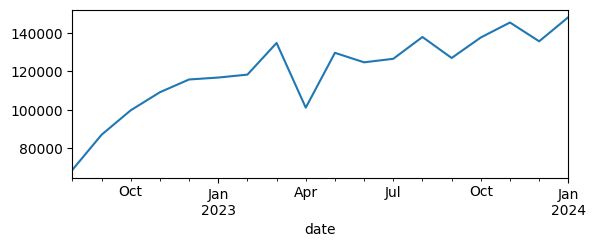

In [17]:
# Realizar una grafica de tendencia del numero de espacios ocupados en el tiempo

plt.subplot(2,1,1)
dataSJ.numTrx.plot(style="-")


In [18]:
# Eliminar las columnas que no necesiten para realizar un sistema de prediccion de ocupacion de parqueo
dataSJ= dataSJ.drop(labels=['idCompany'], axis=1)

dataSJ.head()


,numTrx
date,
2022-08-01,68599
2022-09-01,86862
2022-10-01,99611
2022-11-01,109018
2022-12-01,115665


In [23]:
# Escalar entre -1 y 1 los datos de la variable a predecir
scalar = MinMaxScaler (feature_range=(-1,1))
dataSJ_arr = scalar.fit_transform(dataSJ)

dataSJ_arr

array([[-1.        ],
       [-0.5406228 ],
       [-0.21994164],
       [ 0.01667673],
       [ 0.18387162],
       [ 0.20920113],
       [ 0.24748466],
       [ 0.66198813],
       [-0.18507898],
       [ 0.53282523],
       [ 0.40859241],
       [ 0.45484958],
       [ 0.74019016],
       [ 0.46523795],
       [ 0.73407788],
       [ 0.92997283],
       [ 0.6837207 ],
       [ 1.        ]])

In [24]:
# Definir una ventana temporal adecuada para la prediccion y establecer las listas
# xtrain y ytrain para el entrenamiento

steps= 6
xtrain=[]
ytrain=[]

for i in range(len(dataSJ_arr)-steps):
  xtrain.append(dataSJ_arr[i:i+steps])
  ytrain.append(dataSJ_arr[i+steps])

In [25]:
# Convertir las listas en arrays de numpy
xtrain=np.asanyarray(xtrain)
ytrain=np.asanyarray(ytrain)

In [26]:
# Verificar el shape de los datos de entrenamiento (variable independiente y dependiente)

print("xtrain: {} ytrain:{}".format(xtrain.shape, ytrain.shape))

xtrain: (12, 6, 1) ytrain:(12, 1)


In [27]:
# Construir un modelo LSTM para realizar la predicción que tenga la siguiente arquitectura

# Una capa LSTM de 256 neuronas con activación relu
# Una capa LSTM de 256 neuronas con activación relu
# Una capa LSTM de 128 neuronas con activación relu
# Una capa LSTM de 64 neuronas con activación relu
# Una capa LSTM de 32 neuronas con activación relu
# Una capa LSTM de 16 neuronas con activación relu (esta seria la ultima capa LSTM)
# Agregar operaciones de Dropout de 7% despues de cada capa LSTM
# Agregar en la etapa final una red densa con dos capas con 64 neuronas y 32 neuronas
# Finalmente agregar una capa densa de salida
# Imprimir el summary del  modelo

from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(units=256, return_sequences=True, activation='relu',input_shape=(20,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=32, return_sequences=False, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(1))

model.summary()





/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 20, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,681 (2.04 MB)

 Trainable params: 535,681 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compilar el modelo con una funcion de error mse y un optimizador adam

model.compile(loss='mse',optimizer='adam')

In [29]:
# Entrenar el modelo durante 100 epocas
# Usar el 10% de los datos de entrenamiento para validacion
# Usar un batch size de 16

history= model.fit(xtrain, ytrain, epochs=100, validation_split=0.1, batch_size=16, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.3356 - val_loss: 0.6824
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.3064 - val_loss: 0.6277
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2759 - val_loss: 0.5671
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2441 - val_loss: 0.4998
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.2088 - val_loss: 0.4257
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.1743 - val_loss: 0.3451
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1457 - val_loss: 0.2595
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1096 - val_loss: 0.1731
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0844 - val_loss: 0.0944
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0723 - val_loss: 0.0407
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.1051 - val_loss: 0.0268
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.1281 - val_l

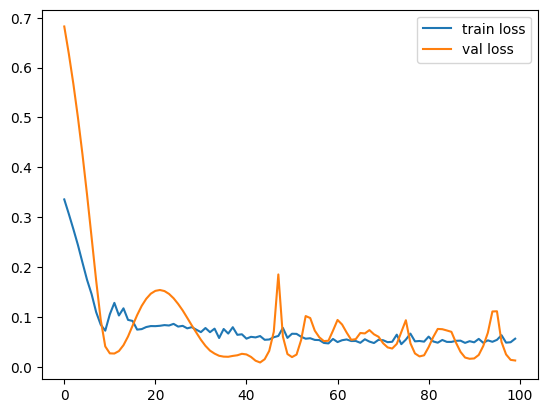

In [30]:
# Grafifcar el loss y loss de validacion para verificar que no haya overfitting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.show()

In [31]:
# Guardar el modelo y salvarlo en disco

model.save('mi_model_parqueadero.h5')

In [34]:
# Tome N registros historicos de su dataset y realice la predicción de ocupación para un mes particular

ver=np.array([68599,86862,99611,109018,115665])
ver_shape=ver.reshape(1,5,1)
print(ver_shape)

pred = model.predict(ver_shape)

print(pred)

[[[ 68599]
  [ 86862]
  [ 99611]
  [109018]
  [115665]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[4164152.2]]


In [ ]:
# Proponga una arquitectura que permita recibir como parametros de entrada no solo los historicos de la
# serie temporal sino tambien información adicional relevante como por ejemplo el mes para el cual se
# realiza la predicción, o el número de dias festivos del mes de predicción